Total Experiments: 1000
Times they agreed (00 or 11):    1000
Times they disagreed (01 or 10): 0
Correlation Accuracy:            100.0%

Histogram (Should only show 00 and 11):


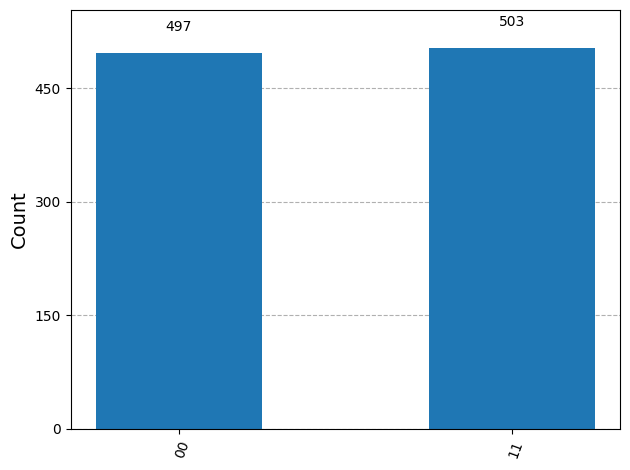

In [1]:
# --- Day 5: Testing Quantum Correlations ---
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Build the Bell State (Entangled Pair)
qc = QuantumCircuit(2)
qc.h(0)      # H on qubit 0
qc.cx(0, 1)  # CNOT from 0 to 1

# 2. Measure both qubits
qc.measure_all()

# 3. Run the "Experiment" 1000 times
sim = AerSimulator()
result = sim.run(qc, shots=1000).result()
counts = result.get_counts()

# 4. Analyze the Correlation
# We explicitly check for "Forbidden States" (01 and 10)
total_shots = sum(counts.values())
agreed = counts.get('00', 0) + counts.get('11', 0)
disagreed = counts.get('01', 0) + counts.get('10', 0)

print(f"Total Experiments: {total_shots}")
print(f"Times they agreed (00 or 11):    {agreed}")
print(f"Times they disagreed (01 or 10): {disagreed}")
print(f"Correlation Accuracy:            {(agreed/total_shots)*100}%")

# 5. Visualize
print("\nHistogram (Should only show 00 and 11):")
display(plot_histogram(counts))